# Lecture 1: Powered Climb and Descent 

## Roadmap of this lecture
Hello there! Welcome to first lecture of the seven-part series. To guide you, a roadmap of the lecture is presented. Should you feel a little lost or in need of some context, this roadmap serves to provide you glimpse of the larger picture. If there are any sections you would like to jump to or revisit, feel free to directly skip ahead. 

Firstly, the [Lecture Objectives](#lec-obj) are stated. These should help you understand what to expect and more importantly inform you of what you are expected to be able to do. It is wise to revisit these objectives once you have understood the content. Thereafter, the framework for all our analysis is set under [Kinematics and Dynamics](#kinematics-and-dynamics). Using this [Steady Climb Performance](#steady-climb) is investigated. Furthermore, [En-route Climb Procedures and Performance](#en-route-climb-p-p) are explored. Lastly, the main [Conclusions](#conclusion) are summarised, and short of preview of the next lecture is given in the section [What next?](#what-next). 


<a id="lec-obj"></a>
## Lecture Objectives
By the end of mastering this lecture, for flights in powered climb and descent phases, you should be able to: 
> *describe* operational and optimal flying strategies   
> *formulate* point-mass equations of motion    
> *derive* expressions for performance metrics     
> *calculate* the most relevant performance metrics     
> *explain* the effects of flight and aircraft parameters on performance metrics 

Make sure to practice sufficiently until you are well comfortable with these objectives! 

<a id="Kinematics-and-dynamics"></a>
## Kinematics and Dynamics 

Prior to beginning with any form of performance prediction, it is quintessential to understand the assumptions made and their implications. Here, we will limit ourselves to considering unsteady, symmetric flight under constant mass. This assumption is three-fold, the implications shall be considered separately. 
1. Unsteady flight implies that the forces and moments action on the body do vary in time, in either magnitude or direction. This can be mathematically written as

$$ \frac{dV}{dt} \neq 0 \space \text{and} \space \frac{d\gamma}{dt} \neq 0$$

2. Symmetric flight implies that both the angle fo sideslip is zero and the plane of symmatery is perpendicular to the horizontal plane of the Earth. 
3. Constant mass simply states the mass of body is assumed to remain constant through the analysis.

Using these assumptions, the following free body diagram can be drawn:

![text](Images\lec1-fbd-gen-eom.png)

Based on these assumptions and the figure above, the general equations of motions can be written as follows:

$$ T\cos{\alpha_T} -D -W \sin{\gamma} = \frac{W}{g}\dot{V} \\ L + T\sin{\alpha_T} - W\cos{\gamma} = \frac{W}{g}V\dot{\gamma}$$

Under some circumstances, these equations simplify. The two most common situations to consider are under steady flight, and under the small angle approximations. Firstly, in the case of steady flight with a rectilinear trajectory the rate of change of velocity and flight path angle are zero, hence the equations of motion become:

$$ T\cos{\alpha_T} -D -W \sin{\gamma} = 0 \\ L + T\sin{\alpha_T} - W\cos{\gamma} = 0$$

Furthermore, in the case of gentle climbs and descents that is, if $|\gamma| << 1$ then $\cos \gamma \approx 1$ and $\sin \gamma \approx \gamma$. Furthermore, the same is applicable for the thrust angle, $\alpha_T$. In addition, provided the thrust to weight ratio of the aircraft is approximately 0.2/0.3 it can conservatively be assumed that: 

$$ T \sin \alpha_T << W \cos \gamma$$

In which case the general steady equations of motion become:

$$ T -D -W \sin{\gamma} = 0 \\ L - W = 0$$

Please note, even though the small angle approximation suggests the use of $\gamma$ rather than $\sin \gamma$ as the coefficient for weight, when performing computations the complexity is the same and hence $\sin \gamma$ is used. 



<span style='color:green'>Challenge!
Can you derive the analytical expressions for $\gamma$ and $L$ for steady symmetric flight without the small angle approximation? 

<a id="steady-climb"></a>
## Steady Climb Performance 

To consider steady climb performance, let us revisit the applicable equations of motion, namely:

$$ T -D -W \sin{\gamma} = 0 \\ L - W = 0$$

The equation provides the relation between the angle of climb, thrust required and thrust available. This is because the term $\sin \gamma$ is the angle of climb, $D$ is the drag (in other words the thrust required), and $T$ is the thrust avaiable. This equation can be rearranged to obtain an explicit equation for the angle of climb: 

$$ \sin \gamma = \frac{T - D}{W}$$

It is known that the rate of climb is simply the angle of climb multiplied by the velocity. With this in mind, let us multiply the angle of climb equation by velocity to obtain:

$$ TV - DV -WV \sin \gamma = 0 \Rightarrow V \sin \gamma = \frac{TV - DV}{W}$$

The implicit form of the equation is known as the power equation, as it illustrates the relation between the power available, $TV$, power required, $DV$, and the rate of climb $V \sin \gamma$. 

To gain a more intuitive understanding, recall that the rate of climb can also be defined as the rate of change of altitude. Furthermore, recall that altitude is the potential energy per unit weight. Combining these two trains of thought:

$$ \frac{TV - DV}{W} = \frac{P_a - P_r}{W} = V \sin \gamma = \frac{\partial h}{\partial t} = \frac{\partial (E_p/W)}{\partial t}$$

This is insightful because it demonstrates the difference between the available and required power is equivalent to the rate of change of potential energy - which is what you would intuitively expect (excess power allows us to climb)!



In [26]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
# from data_file import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# from function_file import *

def get_aircraft_data(aircraft_name):
    aircraft_data = pd.read_csv('Aircraft_data.csv')
    surface_area = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Wing_surface_area'].iloc[0]
    weight = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['MTOW'].iloc[0]
    aspect_ratio = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Wing_aspect_ratio'].iloc[0]
    max_thrust = aircraft_data.loc[aircraft_data['Aircraft_name'] == aircraft_name]['Thrust'].iloc[0]
    return surface_area, weight, aspect_ratio, max_thrust

def td_aoc_curve(name, rho):
    sns.set_style('whitegrid')
    C_D0 = 0.02
    e = 0.9
    S, W, A, T_max = get_aircraft_data(name)
    W = W * 9.81
    velocities = np.linspace(50, 400, 351)
    velocities2 = np.linspace(1, 400, 400)
    D = (C_D0 * 0.5 * rho * velocities**2 * S + 2 * W**2 / (np.pi * A * e * rho * velocities**2 * S))
    T_plot = T_max * (1-0.02*velocities2**0.5)
    T = T_max * (1-0.02*velocities**0.5)
    AOC = (T - D)/W

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(velocities, D/1000, label='Thrust required', color='red')
    plt.plot(velocities2, T_plot/1000, label='Thrust available', color='blue')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('Thrust [kN]')

    plt.subplot(1, 2, 2)
    plt.plot(velocities, AOC, label='AOC', color='red')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('AOC')

    plt.show()

# density = float(input("Enter the altitude density: "))
# td_aoc_curve(density)

aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

density = widgets.FloatText(description="Enter desired value for density: ")
density.style = {'description_width': 'initial'}
display(density)

button = widgets.Button(description="Plot")

output = interactive_output(td_aoc_curve, {'name': aircraft_name, 'rho': density})

# display(button)

def on_button_click(b):
    output.clear_output(wait=True)
    with output:
        td_aoc_curve(aircraft_name.value, density.value)

button.on_click(on_button_click)

display(output)

Text(value='', description='Enter aircraft name: ', style=TextStyle(description_width='initial'))

FloatText(value=0.0, description='Enter desired value for density: ', style=DescriptionStyle(description_width…

Output()

Text(value='', description='Enter aircraft name: ', style=TextStyle(description_width='initial'))

FloatText(value=0.0, description='Enter desired value for density: ', style=DescriptionStyle(description_width…

Output()

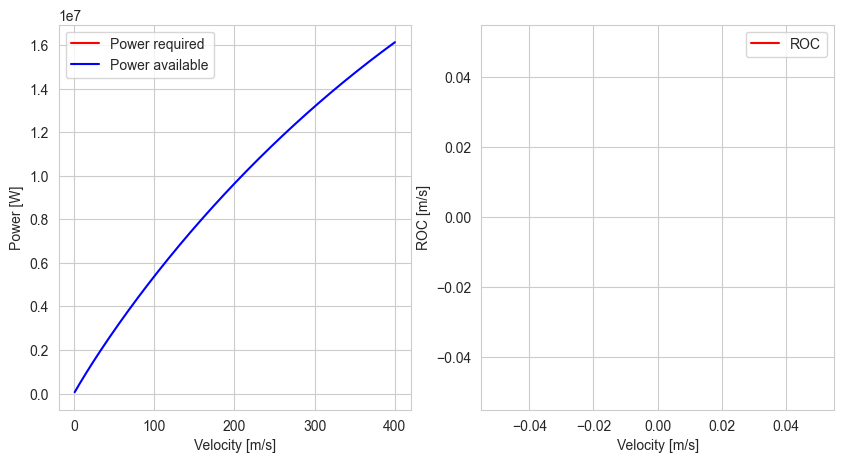

In [29]:
# papr_roc_curve(density)

aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

density = widgets.FloatText(description="Enter desired value for density: ")
density.style = {'description_width': 'initial'}
display(density)

button_1 = widgets.Button(description="Plot")

def papr_roc_curve(name, rho):
    global current_fig
    if current_fig is not None:
        plt.close(current_fig)
        
    sns.set_style('whitegrid')
    C_D0 = 0.02
    e = 0.9
    S, W, A, T_max = get_aircraft_data(name)
    W = W * 9.81
    velocities = np.linspace(50, 400, 351)
    velocities2 = np.linspace(1, 400, 400)
    DV = (C_D0 * 0.5 * rho * velocities**2 * S + 2 * W**2 / (np.pi * A * e * rho * velocities**2 * S)) * velocities
    Pr_plot = T_max * (1-0.02*velocities2**0.5) * velocities2
    PR = T_max * (1-0.02*velocities**0.5) * velocities
    ROC = (PR - DV)/W

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(velocities, DV, label='Power required', color='red')
    plt.plot(velocities2, Pr_plot, label='Power available', color='blue')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('Power [W]')

    plt.subplot(1, 2, 2)
    plt.plot(velocities, ROC, label='ROC', color='red')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('ROC [m/s]')
    plt.ylim(0, max(ROC)+2)
    # plt.xlim(0, 250)

    plt.show()

output_1 = interactive_output(papr_roc_curve, {'name': aircraft_name, 'rho': density})

# display(button)

def on_button_click(b):
    output_1.clear_output(wait=True)
    with output_1:
        papr_roc_curve(aircraft_name.value, float(density.value))

button_1.on_click(on_button_click)

display(output_1)

### Altitude Effects

The effect of altitude arises from the difference in air density. With decreasing air density the power required curves experience a horizontal translation to the right and an upward displacement. Similarly the power available curves have lower gradients. Hence, the rate of climb decreases as altitude increases. To visualise this result, enter two desired densities in the cell below. 

In [25]:
# rhol = float(input("Enter the lower altitude density: "))
# rhou = float(input("Enter the upper altitude density: "))

# visualise_altitude_effects_rc(rhol, rhou)

aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

density_l = widgets.FloatText(description="Enter desired value for lower density: ")
density_l.style = {'description_width': 'initial'}
density_u = widgets.FloatText(description="Enter desired value for upper density: ")
density_u.style = {'description_width': 'initial'}
display(density_l, density_u)

button = widgets.Button(description="Plot")

def visualise_altitude_effects_rc(name, rhol, rhou):
    sns.set_style('whitegrid')
    plt.clf()
    C_D0 = 0.02
    e = 0.9
    S, W, A, T_max = get_aircraft_data(name)
    W = W * 9.81
    velocities = np.linspace(50, 250, 201)
    velocities2 = np.linspace(1, 250, 350)
    DVl = (C_D0 * 0.5 * rhol * velocities**2 * S + 2 * W**2 / (np.pi * A * e * rhol * velocities**2 * S)) * velocities
    DVu = (C_D0 * 0.5 * rhou * velocities**2 * S + 2 * W**2 / (np.pi * A * e * rhou * velocities**2 * S)) * velocities
    
    Pr_plotl = T_max * (1-0.02*velocities2**0.5) * velocities2 * (rhol/1.225)**0.85
    Pr_plotu = T_max * (1-0.02*velocities2**0.5) * velocities2 * (rhou/1.225)**0.85
    PRl = T_max * (1-0.02*velocities**0.5) * velocities * (rhol/1.225)**0.85
    PRu = T_max * (1-0.02*velocities**0.5) * velocities * (rhou/1.225)**0.85
    
    ROCl = (PRl - DVl)/W
    ROCu = (PRu - DVu)/W
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(velocities, DVl, label=f'Power required at density = {rhol}', color='red', linestyle='--')
    plt.plot(velocities, DVu, label=f'Power required at density = {rhou}', color='red')
    plt.plot(velocities2, Pr_plotl, label=f'Power available at density = {rhol}', color='blue', linestyle='--')
    plt.plot(velocities2, Pr_plotu, label=f'Power available at density = {rhou}', color='blue')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('Power [W]')
    plt.xlim(0, 250)

    plt.subplot(1, 2, 2)
    plt.plot(velocities, ROCl, label=f'ROC at density = {rhol}', color='green', linestyle='--')
    plt.plot(velocities, ROCu, label=f'ROC at density = {rhou}', color='green')
    plt.legend()
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('ROC [m/s]')
    plt.ylim(0, max(ROCu)+2)
    plt.xlim(0, 250)

    plt.tight_layout()
    plt.show()
    

output = interactive_output(visualise_altitude_effects_rc, {'name': aircraft_name, 'rhol': density_l, 'rhou': density_u})

# display(button)

def on_button_click(b):
    output = interactive_output(visualise_altitude_effects_rc, {'name': aircraft_name, 'rhol': density_l, 'rhou': density_u})
    output.clear_output()
    with output:
        visualise_altitude_effects_rc(aircraft_name.value, float(density_l.value), float(density_u.value))

button.on_click(on_button_click)

display(output)

Text(value='', description='Enter aircraft name: ', style=TextStyle(description_width='initial'))

FloatText(value=0.0, description='Enter desired value for lower density: ', style=DescriptionStyle(description…

FloatText(value=0.0, description='Enter desired value for upper density: ', style=DescriptionStyle(description…

Output()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

This notion can be extended, that is the rate of climb climbs can be computed at several altitudes. Doing so, one obtains the following plot. 

In [30]:
# altitude_effects_rc_v2()

aircraft_name = widgets.Text(description="Enter aircraft name: ")
aircraft_name.style = {'description_width': 'initial'}
display(aircraft_name)

button = widgets.Button(description="Plot")

output = interactive_output(altitude_effects_rc_v2, {'name': aircraft_name})

# display(button)

def altitude_effects_rc_v2(name):
    sns.set_style('whitegrid')
    C_D0 = 0.04
    e = 0.9
    S, W, A, T_max = get_aircraft_data(name)
    W = W * 9.81
    # W = 445600
    # S = 94
    # A = 30.65
    # T_max = 67200
    altitude_un = np.linspace(0, 10500, 200)
    velocity = np.linspace(10, 180, 200)
    altitude, velocity = np.meshgrid(altitude_un, velocity)

    rho = 1.225 * (1 - 0.0065 * altitude / 288.15) ** (9.81 / (0.0065 * 287))
    dv = (C_D0 * 0.5 * 1.225 * velocity**2 * S + 2 * W**2 
          / (np.pi * A * e * 1.225 * velocity**2 * S)) * velocity
    # pa = T_max * (1-0.02*velocity**0.5) * velocity * (rho/1.225)**0.85
    pa = T_max * velocity * (rho/1.225)**0.85
    roc = (pa - dv)/W
    # print(roc)
    roc1 = np.where(roc < 0, np.nan, roc)
    roc2 = np.where(roc < 0, 0, roc)
    # for i in range(roc.shape[0]):
    #     for j in range(roc.shape[1]):
    #         if roc[i, j] > 0:
    #             print(f'something works {i} and {j} and {roc[i, j]}')
    # print(roc.max(axis=1))

    # # subplot 1 
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    contour_plot = plt.contourf(velocity, altitude, roc1, levels=20, cmap='RdBu', vmin=0)
    contour_lines = plt.contour(velocity, altitude, roc1, levels=20, colors='k', linestyles='dashed', vmin=0)

    # # Add a colorbar
    plt.colorbar(contour_plot, label='ROC', extend='both')
    plt.xlabel('Velocity [m/s]')
    plt.ylabel('Altitude [m]')

    # # subplot 2
    # print(roc.max(axis=0))
    plt.subplot(1, 2, 2)
    plt.plot(roc2.max(axis=0), altitude_un)
    plt.xlabel('ROC [m/s]')
    plt.ylabel('Altitude [m]')
    plt.show()
    return 

def on_button_click(b):
    output = interactive_output(altitude_effects_rc_v2, {'name': aircraft_name})
    output.clear_output()
    with output:
        altitude_effects_rc_v2(aircraft_name.value, float(density_l.value), float(density_u.value))

button.on_click(on_button_click)

display(output)

Text(value='', description='Enter aircraft name: ', style=TextStyle(description_width='initial'))

Output()

From this plot it becomes clear as altitude increases, rate of climb decreases. This is also illustrated below where the maximum rate of climb is plotted against altitude. It appears that this curve is almost linear. 

Two points on this curve are of significant importance, the absolute ceiling (or theoretical ceiling) and service ceiling. The former refers to the altitude at which maximum rate of climb is equal to zero. By definition at this altitude the power available curve is tangent to the power required curve. In practice, however, the practical upper limit of flight altitude i.e., service ceiling is used. This is defined as the altitude at which the maximum rate of climb is reduced to 0.5m/s. 

<a id="en-route-climb-p-p"></a>
## En-route Climb Procedures and Performance 

### Airspeed measurement: instrumentation
As you might recall from previous courses, the determination of airspeed is performed through the measurement of differential pressure. This differential pressure, often termed impact pressure, refers to the difference between the total pressure and the freestream static pressure. 

$$ q_c = p_t - p$$ 

where, $p_t$ is the total pressure and $p$ is the freestream static pressure. 
The total pressure is determined by a pitot-probe, as it has a orifice at the stagnation point. The freestream static pressure is determined by a static-probe. Usually these two probes are combined to form the pitot-static problem. 

$$V = \sqrt{\frac{2\gamma}{\gamma-1}\frac{p}{\rho}\left[ \left(1+\frac{p_t-p}{p} \right)^\frac{\gamma-1}{\gamma} -1 \right]}$$

#### Different types of airspeed
Having seen how airspeed is determined, it is important to distinguish between different types of airspeed. The three types we will focus on include: Indicated Airspeed (IAS), Equivalent Airspeed (EAS), and True Airspeed (TAS). 

**Indicated Airspeed** is the measured airspeed assuming standard sea-level conditions. Hence, the following holds:

$$V_i = \sqrt{\frac{2\gamma}{\gamma-1}\frac{p_0}{\rho_0}\left[ \left(1+\frac{p_t-p}{p_0} \right)^\frac{\gamma-1}{\gamma} -1 \right]}$$

Important to note: 
- IAS does not depend on altitude and hence is a convenient measurement for pilots 
- IAS does account of compressibility effects and as a result it is relatively accurate at high speed 
- IAS does need to be corrected for position and orientation of the probe, in such a case the airspeed is denoted as Calibrated Airspeed (CAS). Please note, in the scope of this course it is assumed $V_i = V_c$
- At low Mach numbers (incompressible flow) $IAS \approx EAS$


**Equivalent Airspeed** is the measured airspeed assuming standard sea-level conditions, and incompressible flow. Hence, making use of Bernoulli:

$$p_t-p = \frac{1}{2}\rho V^2 \Rightarrow V_e = \sqrt{\frac{2(p_t-p)}{\rho_0}}$$

Important to note:
- EAS does not depend on altitude and hence is convenient for pilots 
- EAS has the same dynamic pressure, $q_\infty$, as its corresponding velocity, $V$ and therefore is convenient for engineers
- EAS does not account for compressibility effects and as a result is only accurate at low speeds


**True Airspeed** is the actual airspeed at which the aircraft is flying. At low subsonic speeds, the TAS can be computed by correcting EAS for altitude, namely by:

$$V = V_e \sqrt{\frac{\rho_0}{\rho}}$$

At higher speeds, TAS can be computed from the calibrated airspeed. 

#### Flight Strategy

Based on the different types of airspeeds introduced, it becomes clear that the analysis considered thus far has assumed steady flight, implying constant true airspeed. Alternatively one could consider flying with constant indicated airspeed. From a practical perspective, flying at constant indicated airspeed is a more convenient task for the pilot. This is because flying at constant true airspeed requires that the pilot continuously calculates what the true airspeed is. 

Recalling the equation for IAS and the assumption that for incompressible flow $IAS \approx EAS$, it can be noted that for any altitude above sea level:
$$ TAS > EAS \approx IAS$$
Hence, flying at constant IAS implies that the TAS will increase with increasing altitude, that is the aircraft is accelerating and hence the flight is unsteady. This increase in TAS is not monotonic as there exists a Mach number that may not be exceeded. Hence the increase of TAS with altitude is plotted in the figure below. 

![alt text](\Images\lec1-crossover.png)

From the plot it becomes apparent at a certain point after which the Mach number is the limiting constraint. This point is known as the crossover speed. Furthermore, please note the top of the Mach number is vertical as temperature is contant in the Tropopause (and hence so is the speed of sound).


### Performance
Having seen how climb performance exists under steady conditions, let us now consider unsteady climb performance. Again as before, we begin our analysis with the equations of motion, however now without the assumption of steady flight. However, please note the trajectory is still assumed to be quasi-rectilinear. Hence, the equations of motion become:

$$ T -D -W \sin{\gamma} = \frac{W}{g} \dot{V} \\ L - W = 0$$

Following the same procedure as before, the rate of climb can be derived by converting the first equation of motion into the power equation:

$$ \frac{TV - DV}{W} = V \sin \gamma + \frac{V}{g} \dot{V} $$

However, unlike before, on the right-hand side of the equation there exists an additional term along with the rate of climb. This additional term can be explained as the rate of change of kinetic energy per unit weight. This too intuitively makes sense, as now with accelerated climb the excess power is used for both climbing in altitude and increasing speed, that is:

$$\frac{P_a - P_r}{W} = V \sin \gamma + \frac{V}{g} \dot{V}= \frac{\partial (E_{p} /W)}{\partial t} + \frac{\partial (E_{k} /W)}{\partial t}$$

Upon further investigating the equation, one observes that the left-hand side of the equation is the rate of climb under steady conditions. Hence it is reasonable to wonder whether the rate of climb under accelerated flight is related to the rate of climb under steady conditions. To do so, first apply the chain rule to the rate of change of velocity:

$$ \frac{dV}{dt} = \frac{\partial V}{\partial h} \frac{dh}{dt} = \frac{\partial V}{\partial h} ROC$$

Hence, 

$$ ROC_{steady} = ROC + \frac{V}{g} \frac{\partial V}{\partial h} ROC = ROC \left( 1 + \frac{V}{g} \frac{\partial V}{\partial h }\right) $$

$$ \frac{ROC}{ROC_{steady}} = \frac{1}{1+\frac{V}{g} \frac{\partial V}{\partial h}} $$

If one climbs at constant EAS, then the analytical expression for $\frac{\partial V}{\partial h}$ is:

$$\frac{\partial V}{\partial h} = V_e \frac{\partial \left( \sqrt{\frac{\rho_0}{\rho}} \right)}{\partial h} $$


<span style='color:green'>Challenge!
Can you derive the analytical expressions for $\frac{\partial V}{\partial h}$ using the ISA atmosphere model?

## Powered Descent Procedures and Performance

Powered descent procedures and performance are largely equivalent to climb procedures and performance. The only vital difference being, a deficit in power available with respect to power required is used (rather than excess). Hence, the steady rate of climb is less than zero. 

<a id="conclusion"></a>
## Conclusions

That marks the end of the first lecture! It was a lot of information to digest so, please take your time to go through all of it. Once you feel as though you have understood the bulk of the contents check if you can do the following: 

- Dervive the equations of motion for unsteady, symmetric flight under constant mass
- Understand and correctly apply necessary simplifications to the general equations of motion based on the postulates of the problem 
- Calculate both the angle and rate of climb for steady flight 
- Analyse how rate of climb is affected by altitude quantitatively (in terms of numerical computations) and qualitatively (in terms of the flight envelope)
- Explain the different types of airspeeds commonly used and where they are applicable
- Derive and perform computations for rate of climb under unsteady conditions 

Please use these objectives as a foundation, you are strongely encouraged to go beyond and consider further implications of the theory described.

If these objectives feel doable, please test your understanding using the practice exercises given below. 

<a id="what-next"></a>
## What next?

- Sharpen your skills by attempting the practice questions!
- Start reading the next lectures by clicking on the lecture of your choice below!

<!-- <!DOCTYPE html> -->
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dynamic Timeline</title>
    <script>
        // Set the size as a variable
        var imageSize = 800; // Set the size to your desired value

        // Function to calculate coordinates based on image width
        function calculateCoordinates() {
            // Calculate coordinates for each area
            for (var i = 1; i <= 7; i++) {
                var startCoord = (i - 1) * (imageSize / 7);
                var endCoord = i * (imageSize / 7);

                // Update the coordinates in the HTML map
                var area = document.getElementById("area" + i);
                area.coords = startCoord + ",0," + endCoord + ",135";
            }
        }
    </script>
</head>
<body onload="calculateCoordinates()">

<img src="Images\lec-timeline-no-pictures.png" usemap="#timeline" alt="Timeline Image">

<map name="timeline">
    <!-- Set coordinates based on the calculated image width -->
    <area id="area1" shape="rect" coords="0,0,0,0" href="Lecture 1.ipynb" alt="Notebook 1">
    <area id="area2" shape="rect" coords="0,0,0,0" href="Lecture 2.ipynb" alt="Notebook 2">
    <area id="area3" shape="rect" coords="0,0,0,0" href="Lecture 3.ipynb" alt="Notebook 3">
    <area id="area4" shape="rect" coords="0,0,0,0" href="Lecture 4.ipynb" alt="Notebook 4">
    <area id="area5" shape="rect" coords="0,0,0,0" href="Lecture 5.ipynb" alt="Notebook 5">
    <area id="area6" shape="rect" coords="0,0,0,0" href="Lecture 6.ipynb" alt="Notebook 6">
    <area id="area7" shape="rect" coords="0,0,0,0" href="Lecture 7.ipynb" alt="Notebook 7">
</map>

</body>
</html>
